## ABD Beyzbol Ligi Oyuncularının Dört Farklı Modelle Maaş Tahmin Projesi
Bu projede aşağıda açıklanan veriler beyzbol oyuncularının maaşlarını tahmin etmek için kullanılacaktır. "https://www.kaggle.com" adresinden alınan ve indirilen veriler
#### Açıklama
##### Bağlantı
Bu veri seti, R-package ISLR'nin bir parçasıdır ve ilgili kitapta G. James ve diğerleri tarafından kullanılmaktadır.(2013) Ridge regresyonunun ve LASSO'nun R kullanılarak nasıl gerçekleştirildiğini göstermek için "R'deki uygulamalarla İstatistiksel Öğrenmeye Giriş".
##### İçerik
Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde tutulan StatLib kütüphanesinden alınmıştır.Bu, 1988 ASA Grafik Bölümü Poster Oturumunda kullanılan verilerin bir parçasıdır.Maaş verileri aslen Sports Illustrated, 20 Nisan 1987'den alınmıştır. 1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanan 1987 Beyzbol Ansiklopedisi Güncellemesinden elde edilmiştir.
##### Biçim
Aşağıdaki 20 değişken üzerinde büyük lig oyuncularının 322 gözlemini içeren bir veri çerçevesi.
- AtBat 1986'da vuruş sayısı
- Hits 1986'daki isabet sayısı
- HmRun 1986'da ev sahibi koşu sayısı
- Runs 1986 yılındaki koşu sayısı
- RBI 1986 yılında atışla birlikte yapılan koşu sayısı
- Walks 1986'daki yürüyüş sayısı
- Years büyük liglerdeki yıl sayısı
- CAtBat kariyeri boyunca vuruş sayısı
- CHits kariyeri boyunca isabet sayısı
- CHmRun kariyeri boyunca ev sahibi koşu sayısı
- CRuns kariyeri boyunca koşu sayısı
- CRBI kariyeri boyunca atışla birlikte yapılan koşu sayısı
- CWalks kariyeri boyunca yaptığı yürüyüş sayısı
- A ve N seviyelerine sahip A Ligi faktörü, 1986 sonunda oyuncunun ligini gösterir.
- 1986 sonunda oyuncunun bölünmesini gösteren E ve W seviyelerine sahip Division A faktörü
- PutOut'lar 1986'da dışarı çıkanların sayısı
- Asist 1986'daki asist sayısı
- Errors 1986'daki hata sayısı
- Salary 1987 açılış gününde binlerce dolar yıllık maaş
- NewLeague 1987'nin başında oyuncunun ligini gösteren A ve N seviyelerine sahip A faktörü

In [1]:
# Önemli kütüphanler

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [2]:
# Veriyi tanıtma
df = pd.read_csv('Hitters.csv')

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [6]:
df.shape

(322, 20)

In [7]:
# eksik değerleri algılama

df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

Maaş değişkeninde 59 eksik değer var

In [ ]:
#Eksik değerleri görselleştirmek için aşağıdaki paketi yüklemem gerekiyor

conda install -c conda-forge/label/cf202003 missingno

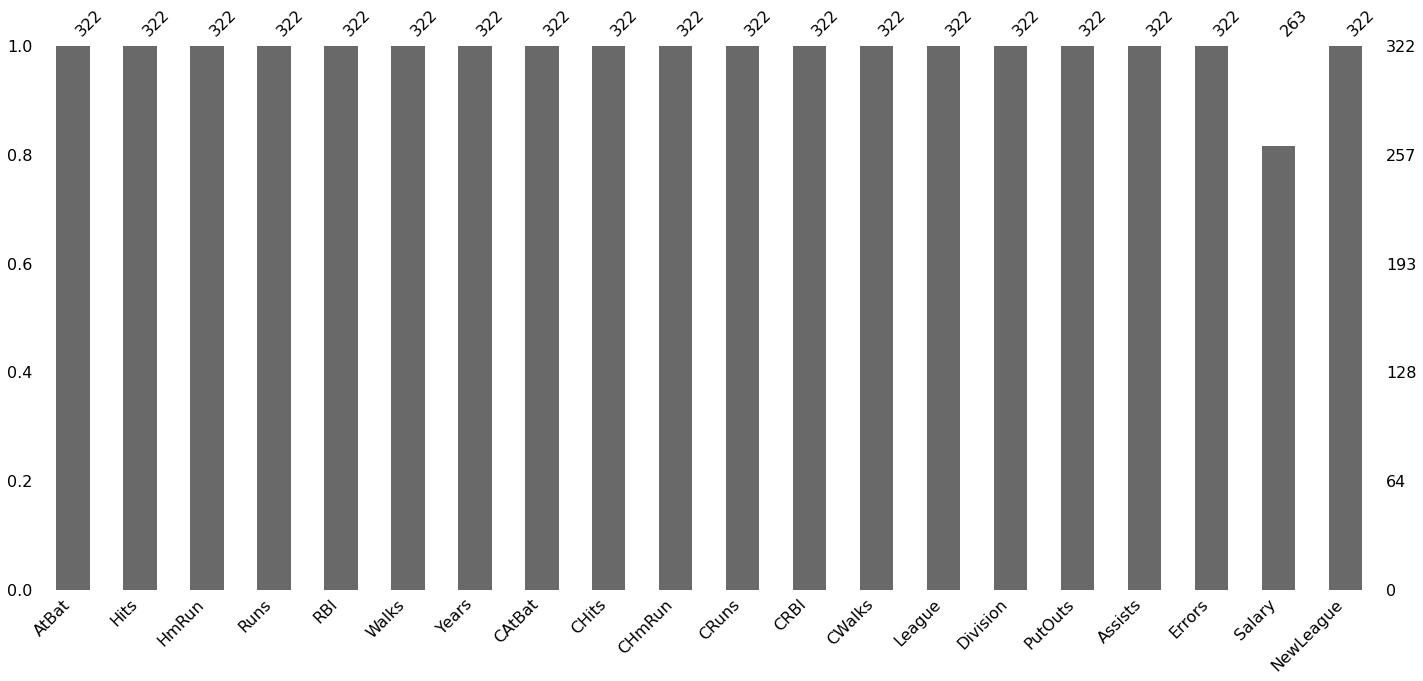

In [8]:
#Eksik değerleri görselleştirme

import missingno as msno
msno.bar(df);

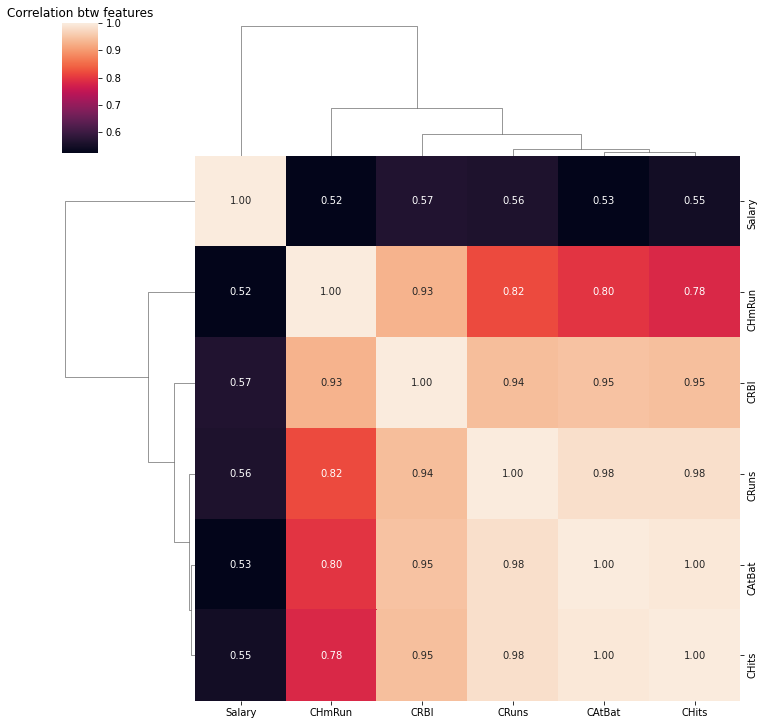

In [9]:
#Özellikler arasında 0,5'ten büyük korelasyon değerleri (0,5 olduğu için sadece 0,5'in üzerindeki değerleri görebiliyorum)

correlation_matrix = df.corr().round(2)
filtre=np.abs(correlation_matrix['Salary'])>0.50
corr_features=correlation_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt=".2f")
plt.title('Correlation btw features')
plt.show()

In [10]:
# Bazı değişkenler arasında çok yüksek korelasyon olmasına rağmen hiçbir şey yapmayacağım. Normalde bu sorun çözülmelidir.
# Burada eksik değerleri sileceğim.

df = df.dropna()

In [11]:
df.shape

(263, 20)

In [12]:
df.sort_values('Salary', ascending = False).head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
163,618,200,20,98,110,62,13,7127,2163,351,1104,1289,564,A,E,330,16,8,2412.500,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,A,E,1377,100,6,1975.000,A
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,N,E,229,453,15,1940.000,N


In [13]:
# 3 kategorik değişkenim var

df['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [14]:
df['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [15]:
df['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [16]:
# Nominal değişkenleri tek bir sıcak kodlama yöntemiyle dönüştürme. Normalde, kukla değişkenler için etiket kodlama değişkeni uygulanabilir. 3 veya daha fazla kategoriye sahip nominal değişkenler için bir sıcak kodlama uygundur

df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)

In [17]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [18]:
# Aykırı değerleri tespit etmek için LocalOutlierFactor kullanacağım. 20 ve 'auto' varsayılan değerlerini kullanacağım.

clf=LocalOutlierFactor(n_neighbors=20, contamination='auto')
clf.fit_predict(df)
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-6.22764656, -4.12325749, -3.14372723, -2.46482586, -2.37903838,
       -1.93271815, -1.92868899, -1.90888428, -1.6775256 , -1.66536304,
       -1.62626849, -1.48361164, -1.48216262, -1.44345727, -1.43603775,
       -1.42239393, -1.40734739, -1.38353101, -1.37252134, -1.3532077 ])

In [19]:
?LocalOutlierFactor

Init signature:
LocalOutlierFactor(
    n_neighbors=20,
    *,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=False,
    n_jobs=None,
)
Docstring:     
Unsupervised Outlier Detection using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor.
It measures the local deviation of density of a given sample with
respect to its neighbors.
It is local in that the anomaly score depends on how isolated the object
is with respect to the surrounding neighborhood.
More precisely, locality is given by k-nearest neighbors, whose distance
is used to estimate the local density.
By comparing the local density of a sample to the local densities of
its neighbors, one can identify samples that have a substantially lower
density than their neighbors. These are considered outliers.

.. versionadded:: 0.19

Parameters
----------
n_neighbors : int, default=20
    Number of neighbors t

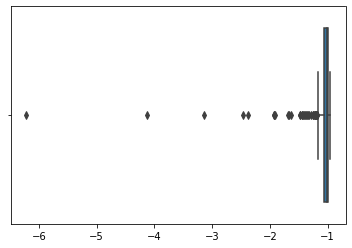

In [20]:
# Beşinci değerden sonraki değerler azalırken 5. değeri eşik olarak alacağım
# Ancak ilk başta bu durumu aykırı değerlerle ilgili olarak görselleştireceğim

sns.boxplot(df_scores);

In [21]:
threshold=np.sort(df_scores)[5]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-1.9327181498464339


In [22]:
df.shape

(257, 20)

In [23]:
# Standardizasyon
# Aşağıdaki satırlarda bazı işlemler yapacağım.
# Maaş benim bağımlı değişkenim, diğerleri kukla değişkenler. İlk başta onları bağımsız değişken kümemden (X) çıkaracağım.
#Sonunda tüm bağımsız değişkenleri birleştireceğim.

df_X=df.drop(['Salary','League_N','Division_W','NewLeague_N'], axis=1)
df_X.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9
1,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19
2,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0
3,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22
4,202,53,4,31,26,27,9,1876,467,15,192,186,161,304,45,11


In [24]:
from sklearn.preprocessing import StandardScaler
scaled_cols=StandardScaler().fit_transform(df_X)



scaled_cols=pd.DataFrame(scaled_cols, columns=df_X.columns)
scaled_cols.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743
1,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756
2,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969
3,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660
4,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346


In [25]:
cat_df=df.loc[:, "League_N":"NewLeague_N"]
cat_df.head()

,League_N,Division_W,NewLeague_N
0,0,1,0
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1


In [26]:
Salary=pd.DataFrame(df['Salary'])

In [27]:
df=pd.concat([Salary,scaled_cols, cat_df], axis=1)
df.head()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,100.000,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743,0,1,0
1,75.000,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756,1,1,1
2,1100.000,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969,0,0,0
3,517.143,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660,0,0,0
4,512.500,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346,1,1,1


In [28]:
# Bağımlı değişken y = Maaş, bağımsız değişkenler x = maaşsız değişkenler


y = df['Salary']
X = df.drop('Salary', axis =1)

In [29]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743,0,1,0
1,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756,1,1,1
2,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969,0,0,0
3,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660,0,0,0
4,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.633171,0.425209,-0.530823,0.395278,-0.137681,-0.190552,-0.484287,0.019484,0.127999,-0.454429,0.051078,-0.060856,-0.464953,0.139585,-0.757017,-0.845065,1,0,1
253,0.599215,0.624906,-0.758763,0.825398,-0.060424,2.428014,0.979969,1.246844,1.214255,-0.369244,1.612808,0.371527,2.309574,0.096290,1.809706,1.744058,0,0,0
254,0.483764,0.403020,-0.986702,0.238871,-0.330826,0.498545,-0.275108,-0.418922,-0.446715,-0.758659,-0.437340,-0.734137,-0.434836,-0.899488,-0.039439,-0.235860,0,1,0
255,1.149305,0.802414,-0.302884,1.177315,0.325866,1.692978,0.143251,0.235845,0.206579,0.336572,0.325436,0.275785,0.265384,3.707790,0.084757,0.525647,0,0,0


In [30]:
y

0       100.000
1        75.000
2      1100.000
3       517.143
4       512.500
         ...   
252     700.000
253     875.000
254     385.000
255     960.000
256    1000.000
Name: Salary, Length: 257, dtype: float64

In [31]:
# Model sonuçlarımızı tahmin edilen değişkenin (y) ortalama değerine göre değerlendireceğiz.

y.mean()

539.2295992217898

### MODELLEME

In [32]:
# Train ve test ayırma süreci ve train ve test boyutunun belirlenmesi
# Modelleri karşılaştırmak için tüm modeller için test boyutu verilerin %20'si ve rastgele durum 46 olacaktır.

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

### Linear Regression

In [33]:
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_linreg_rmse

327.3400731081062

Doğrusal regresyon modeli için tahmin değeri (rmse) 382.00085575367274'tür. y.ortalama değer 538.2316872586872

### Ridge Regression

In [34]:
ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_ridreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridreg_rmse 

315.28976474517196

### Lasso Regression

In [35]:
lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_lasreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_lasreg_rmse

318.6803120461422

### Elastic Net Regression

In [36]:
enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_rmse

302.78610988935907

In [37]:
# Dört modelin Kök Ortalama Kare Hataları (RMSE)

def compML(df, y, alg):
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    print(model_name, "Model RMSE:", RMSE)


In [38]:
models = [LinearRegression, Ridge, Lasso, ElasticNet] 

In [39]:
for model in models:
    compML(df, 'Salary', model)

LinearRegression Model RMSE: 327.3400731081062
Ridge Model RMSE: 315.28976474517196
Lasso Model RMSE: 318.6803120461422
ElasticNet Model RMSE: 302.78610988935907


## Model Tuning

### Ridge Regression Model Tuning

In [40]:
# Çapraz doğrulama fonksiyonu ile hiper parametre optimizasyonu.
# Yeni alfa değerleri atayarak modeli ayarlamaya çalışacağız.
# Ridge regresyonunda varsayılan alfa değeri 1.0'dır. Farklı değerler deneyeceğiz.
# En uygun alfa değeri veya parametresi nihai modelde kullanılacaktır.

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 

ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridge_tuned_rmse

326.89105254127037

### Lasso Regression Model Tuning

In [41]:
# Çapraz doğrulama işleviyle hiper parametre optimizasyonu.
# Yeni alfa değerleri atayarak modeli ayarlamaya çalışacağız.
# Lasso regresyonunda varsayılan alfa değeri 1.0'dır. Farklı değerler deneyeceğiz.
# En uygun alfa değeri veya parametresi nihai modelde kullanılacaktır.

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

# Final Model 

lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lasso_tuned_rmse

323.4231245802036

In [42]:
?Lasso

Init signature:
Lasso(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, default=1.0
    Constant that multiplies the L1 term. Defaults to 1.0.
    ``alpha = 0`` is equivalent to an ordinary least square, solved
    by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.

fit

### Elastic Net Regression Regression Model Tuning

In [43]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read

In [44]:
# Çapraz doğrulama işleviyle hiper parametre optimizasyonu.
# Yeni alfa değerleri atayarak modeli ayarlamaya çalışacağız.
# ElesticNet regresyonunda varsayılan alfa değeri 1.0 ve varsayılan l1_ratio 0,5'tir. Farklı değerler deneyeceğiz.
# En uygun değerler veya parametreler nihai modelde kullanılacaktır.

enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}
enet = ElasticNet()
enet_model = enet.fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

#Final Model 

enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_tuned_rmse 

295.9805666186622

### Comparable Results of Four Basic and Tuned Models

In [45]:
ComparableResults_df =pd.DataFrame({"LINEAR":[df_linreg_rmse],"RIDGE":[df_ridreg_rmse],"RIDGE TUNED":[df_ridge_tuned_rmse],
                             "LASSO":[df_lasreg_rmse],"LASSO TUNED":[df_lasso_tuned_rmse], 
                             "ELASTIC NET":[df_enet_rmse], "ELASTIC NET TUNED":[df_enet_tuned_rmse]})

ComparableResults_df


,LINEAR,RIDGE,RIDGE TUNED,LASSO,LASSO TUNED,ELASTIC NET,ELASTIC NET TUNED
0,327.340073,315.289765,326.891053,318.680312,323.423125,302.78611,295.980567


### SONUÇ





Bu projede, herhangi bir ABD Beyzbol Ligi oyuncusunun maaşını tahmin etmek için dört farklı doğrusal regresyon modeli kullanıldı.Linear, Ridge, Lasso ve ElesticNet Regresyon Makine Öğrenmesi Modelleri kullanılarak kök ortalama kare hata (RMSE) değerleri hesaplanmıştır.RMSE, tahminlerin gözlemlenen değerlerden ortalama sapmasının bir ölçüsüdür.Daha sonra hiperparametre optimizasyonları yardımıyla RMSE değerleri düşürülmeye çalışılmıştır.Sonuç olarak, ayarlanmış ElesticNet Regresyon modelinden elde edilen RMSE değeri en düşük RMSE değeridir(295.98). Analiz ve tahmin sonuçlarına göre, ayarlanmış ElesticNet Regresyon modeli, bir ABD Beyzbol Ligi oyuncusu maaşını tahmin etmek için en iyi modeldir.